In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from astropy.time import Time
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
from ztfquery.lightcurve import LCQuery
from astropy.coordinates import SkyCoord 
from astropy.cosmology import WMAP9 as cosmo
from nuztf.style import output_folder, big_fontsize, base_width, base_height, dpi
from nuztf.observation_log import get_most_recent_obs
from astropy.io import fits
from astropy.table import Table
import logging
import sys
from nuztf.parse_nu_gcn import find_gcn_no, parse_gcn_circular
from nuztf.irsa import plot_irsa_lightcurve

In [2]:
# Set up logging level
logger = logging.getLogger()
handler = logging.StreamHandler(sys.stdout)
formatter = logging.Formatter('%(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)
logger.setLevel(logging.ERROR)

In [3]:
public_folder = "/Users/robertstein/usnik/public_html/public/"

Using Astropy CDS query for name BZQJ0253+0006 (RA=43.337589 deg, Dec=0.100012 deg)
There are a total of 75 detections
Most recent detection on 2021-08-18.47 UT at a magnitude of r=21.20+/-0.23


/usr/local/anaconda3/envs/nuztf_env/lib/python3.8/site-packages/ztfquery/utils/tools.py:76: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([v[0]*np.cos(theta*_DEG2RA) - v[2]*np.sin(theta*_DEG2RA),
/usr/local/anaconda3/envs/nuztf_env/lib/python3.8/site-packages/ztfquery/skyvision.py:222: UserWarning: Column format does not match the completed_log date downloade for 2021-10-20
  warnings.warn(f"Column format does not match the completed_log date downloade for {date}")
/usr/local/anaconda3/envs/nuztf_env/lib/python3.8/site-packages/ztfquery/skyvision.py:59: UserWarning: Download did not seem successful. Cannot retreive the completed_log for 2021-10-20
  warnings.warn(f"Download did not seem successful. Cannot retreive the {which}_log for {date}")
/usr/lo

FORMAT ERROR: [['Log', 'queue.20211020.dat', 'does', 'not', 'exists']]
FORMAT ERROR: [['Log', 'queue.20211021.dat', 'does', 'not', 'exists']]
FORMAT ERROR: [['Log', 'queue.20211025.dat', 'does', 'not', 'exists']]
FORMAT ERROR: [['Log', 'queue.20211026.dat', 'does', 'not', 'exists']]
FORMAT ERROR: [['Log', 'queue.20211027.dat', 'does', 'not', 'exists']]


/usr/local/anaconda3/envs/nuztf_env/lib/python3.8/site-packages/ztfquery/skyvision.py:222: UserWarning: Column format does not match the completed_log date downloade for 2021-10-25
  warnings.warn(f"Column format does not match the completed_log date downloade for {date}")
/usr/local/anaconda3/envs/nuztf_env/lib/python3.8/site-packages/ztfquery/skyvision.py:59: UserWarning: Download did not seem successful. Cannot retreive the completed_log for 2021-10-25
  warnings.warn(f"Download did not seem successful. Cannot retreive the {which}_log for {date}")
/usr/local/anaconda3/envs/nuztf_env/lib/python3.8/site-packages/ztfquery/skyvision.py:222: UserWarning: Column format does not match the completed_log date downloade for 2021-10-26
  warnings.warn(f"Column format does not match the completed_log date downloade for {date}")
/usr/local/anaconda3/envs/nuztf_env/lib/python3.8/site-packages/ztfquery/skyvision.py:59: UserWarning: Download did not seem successful. Cannot retreive the completed_lo

FORMAT ERROR: [['Log', 'queue.20211028.dat', 'does', 'not', 'exists']]
FORMAT ERROR: [['Log', 'queue.20211029.dat', 'does', 'not', 'exists']]


/usr/local/anaconda3/envs/nuztf_env/lib/python3.8/site-packages/ztfquery/skyvision.py:222: UserWarning: Column format does not match the completed_log date downloade for 2021-11-01
  warnings.warn(f"Column format does not match the completed_log date downloade for {date}")
/usr/local/anaconda3/envs/nuztf_env/lib/python3.8/site-packages/ztfquery/skyvision.py:59: UserWarning: Download did not seem successful. Cannot retreive the completed_log for 2021-11-01
  warnings.warn(f"Download did not seem successful. Cannot retreive the {which}_log for {date}")


FORMAT ERROR: [['Log', 'queue.20211101.dat', 'does', 'not', 'exists']]


/usr/local/anaconda3/envs/nuztf_env/lib/python3.8/site-packages/ztfquery/skyvision.py:222: UserWarning: Column format does not match the completed_log date downloade for 2021-11-15
  warnings.warn(f"Column format does not match the completed_log date downloade for {date}")
/usr/local/anaconda3/envs/nuztf_env/lib/python3.8/site-packages/ztfquery/skyvision.py:59: UserWarning: Download did not seem successful. Cannot retreive the completed_log for 2021-11-15
  warnings.warn(f"Download did not seem successful. Cannot retreive the {which}_log for {date}")
/usr/local/anaconda3/envs/nuztf_env/lib/python3.8/site-packages/ztfquery/skyvision.py:222: UserWarning: Column format does not match the completed_log date downloade for 2021-11-16
  warnings.warn(f"Column format does not match the completed_log date downloade for {date}")
/usr/local/anaconda3/envs/nuztf_env/lib/python3.8/site-packages/ztfquery/skyvision.py:59: UserWarning: Download did not seem successful. Cannot retreive the completed_lo

FORMAT ERROR: [['Log', 'queue.20211115.dat', 'does', 'not', 'exists']]
FORMAT ERROR: [['Log', 'queue.20211116.dat', 'does', 'not', 'exists']]
FORMAT ERROR: [['Log', 'queue.20211117.dat', 'does', 'not', 'exists']]
Most recent observation at 2021-11-14.35
Found match to IC211116A:  IceCube-211116A : IceCube observation of a high-energy neutrino candidate track-like event<br


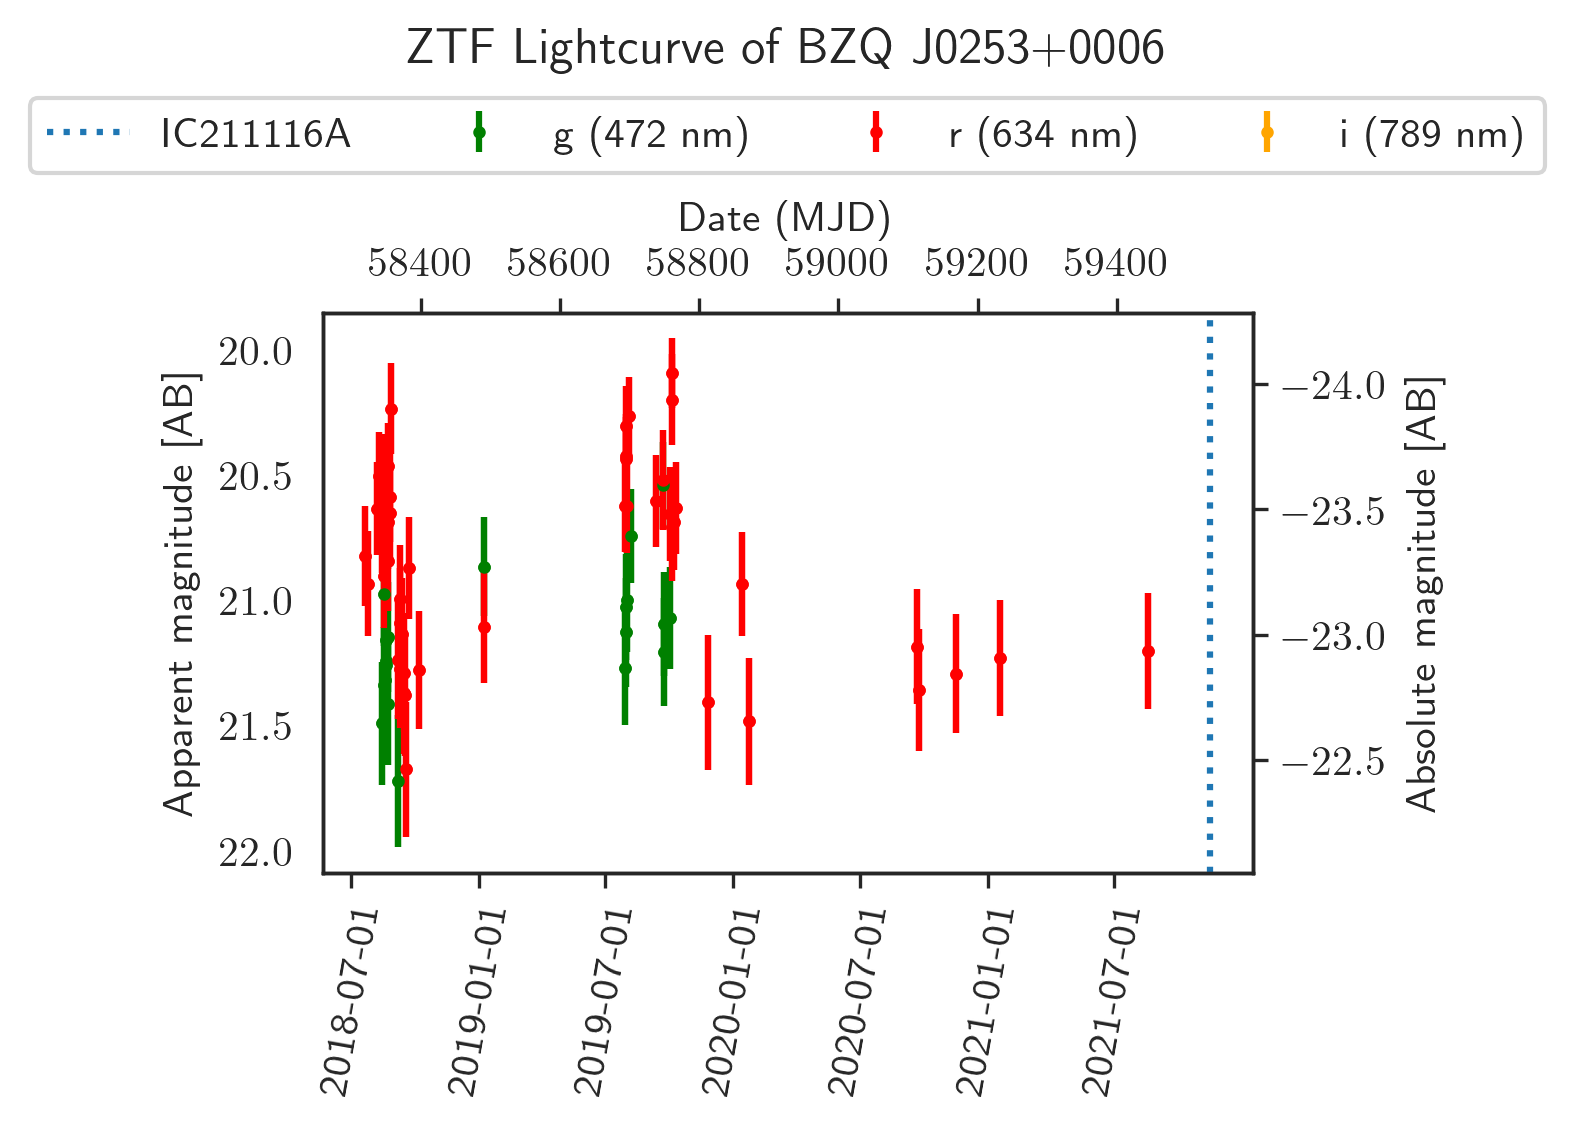

In [6]:
plot_irsa_lightcurve("BZQJ0253+0006", nu_name="IC211116A", source_redshift=1.0, plot_mag=True)